In [34]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../src/")

import os
import pandas as pd
import numpy as np
import random
from eda.utils_plot import get_upack_patch, save2pdf, visualize_col_data
from eda.general_eda import general_stats, general_eda_main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (existing) Analysis of AI4boundaries (https://essd.copernicus.org/articles/15/317/2023/) dataset

Dataset images distribution:

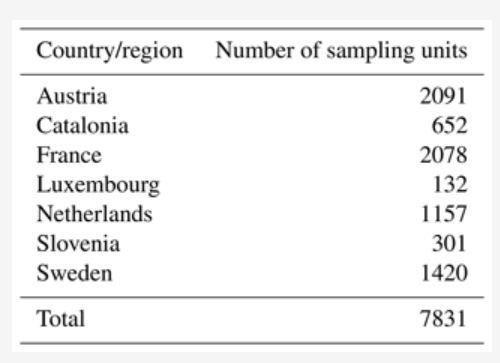

The original dataset contains 14.8 M parcels covering 376 K km2. The stratified sampling resulting in 7831 of 4 km samples contains 2.5 M parcels covering 47 105 km2. The mean area refers to parcel area in hectares, while the total mean area is here in the table the average area for the seven regions:

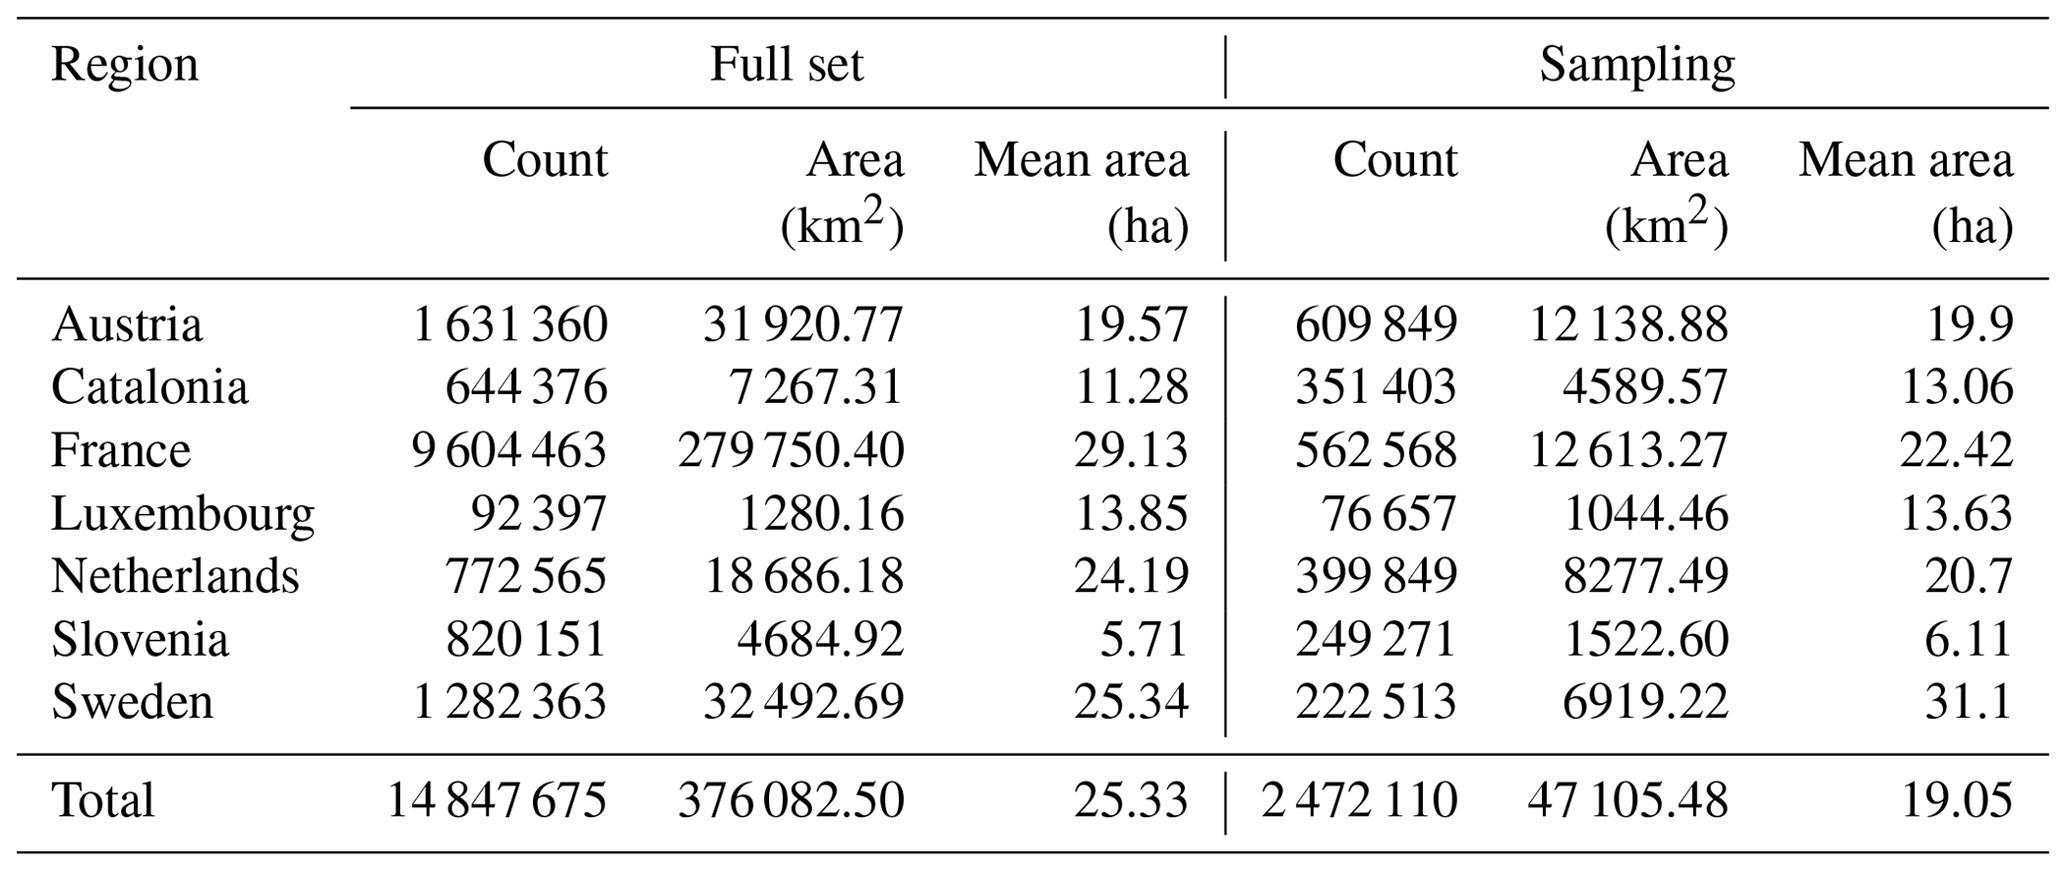

In the regions covered by the dataset, the average size of the parcel is 25.33 ha, ranging from 5.71 ha in Slovenia to 29.13 ha in France.

Distribution of sampling units among the seven regions with the two variables:

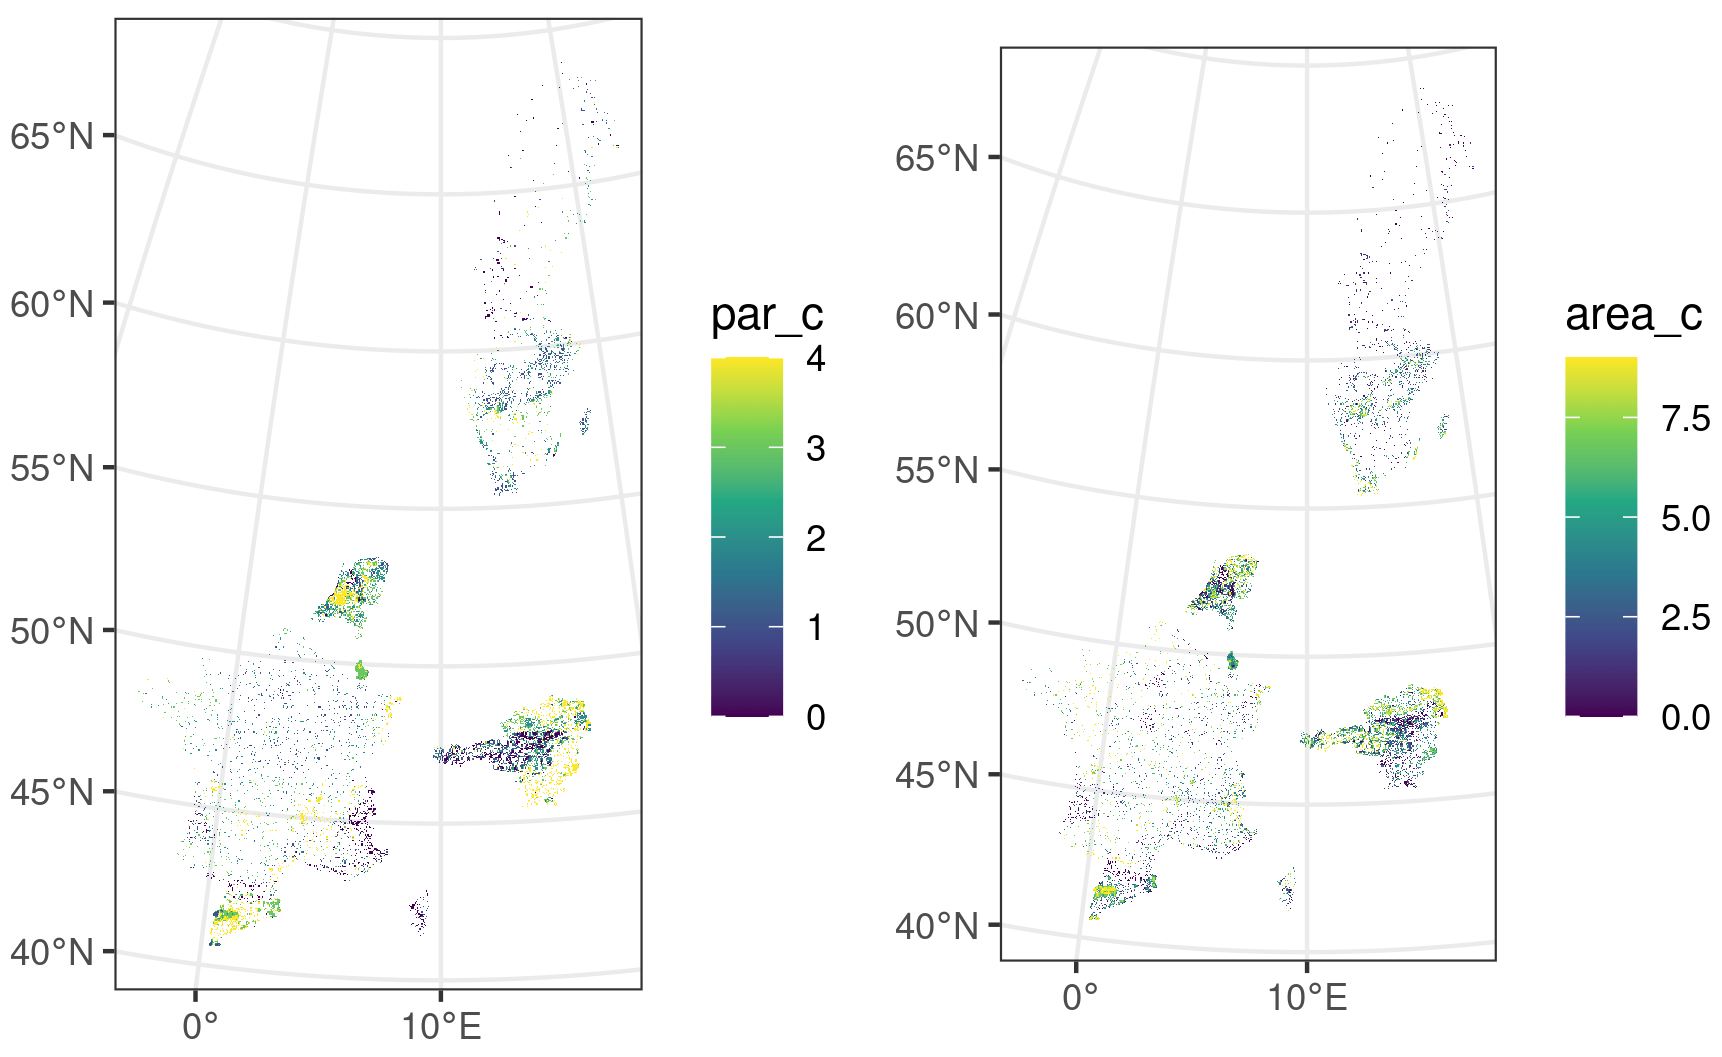

#### Lables

The labels are obtained from vector parcels of the GSAA for each specific region. The GSAA refers to the annual crop declarations made by EU farmers for CAP area-aid support measures. The electronic GSAA records include a spatial delineation of the parcels. A GSAA element is always a polygon of an agricultural parcel with one crop (or a single crop group with the same payment eligibility). The GSAA is operated at the region or country level in the EU-28, resulting in about 65 different designs and implementation schemes over the EU. Since these infrastructures are set up in each region, at the moment, data are not interoperable, nor are legends semantically harmonised. Furthermore, most GSAA data are not publicly available, although several countries are increasingly opening the data for public use. In this study, seven regions with publicly available GSAA are selected, representing a contrasting gradient across the EU

### AI4boundaries data (images, labels) quality existing research

1. https://medium.com/sentinel-hub/utility-of-ai4boundaries-and-eurocrops-as-training-datasets-for-field-delineation-ff514471d067 .
For each sample we scored the quality of the polygon labels according to their fullness (i.e. whether the polygons cover all the visible agricultural parcels) and correctness (i.e. whether the contours of the polygon match what is seen on the image) from 1–5, where 1 represents terrible (<20% are correct) and 5 represents great (>95% are correct).     __Spain, Luxembourg, Netherlands, and Slovenia__ exhibited higher scores. On the other hand, __Austria and France__ showed poor performance, primarily due to a low percentage of agricultural parcels corresponding to fields fullness.     When examining the best-performing countries on a monthly basis, the distribution of scores remains relatively consistent throughout the year, although certain months exhibit a lower prevalence of high scores. These months include January, May, September, October, November, and December. This means that the __boundaries are less, if at all, visible on some months__.                         Generally, patches with a low number of fields tend to have lower scores, regardless of field size. To prepare the dataset for training, we implemented specific rules. Firstly, we calculated the area and count of polygons, and then applied a filtering __criterion of count > 50 and area > 0.1__. This filtering step allowed us to effectively distinguish the majority of low scores (1) from the remaining data. Notably, this differentiation was particularly evident in __France__, where a limited presence of polygons was observed, leading us to exclude samples from France entirely.

Additionally, we removed samples that received a score below 3, indicating a mediocre performance with approximately 60% correct polygons. In addition, to better mitigate the effect of missing polygons, we trained our model __masking out parts__ of the image where there are no GSAA polygons.

2. https://github.com/fkroeber/ai4b/tree/main . During the exploratory data analyses, some flaws in the AI4Boundaries data set were noticed. The most serious ones – introducing many false-positives to the data sets – concern…

- mislabelling of non-agricultural areas as agricultural parcels (frequently occuring for scenes in the Alpine region)

- fragmentations of parcels, i.e. extreme oversegmentations into sets of pixelwise segment

- cloud artifacts the for the imagery can be related to the described pixelwise temporal interpolation technique (only a small number of all tiles are severely affected by this less than 1 %).

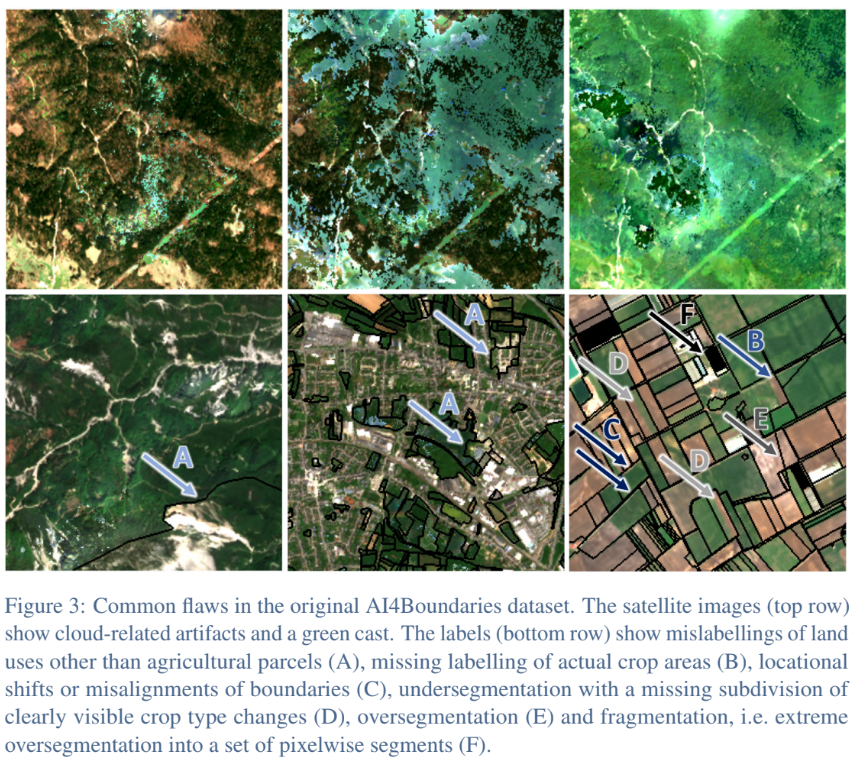

Accordingly, extendend pre-processing based on CORINE Land Cover (CLC) products as auxiliary data and geometric/shape-related filter criteria was applied to derive an enhanced version of the AI4Boundaries data set. This filtered dataset contains 4955 tiles à 256×256 pixels, which is about 2/3 of the original size of AI4Boundaries. Shape: Firstly, the __minimum area__ of a segment is larger than 25 pixels, which corresponds to an area of __0.25 ha__. Secondly, the minor axis length of an ellipse whose normalized second central moments corresponds to the moments of the segment is larger than 1. Thirdly, the segment’s solidity defined as the ratio of its area to the area of its convex hull is larger than 0.4. Fourthly, the segment’s Euler Number defined by the number of objects minus the number of holes is less than or equal to 5. In the third stage, informative samples were selected by excluding all tiles for which the share of agricultural land as defined by the __labels is less than 10 %__. Also, tiles with a total of less than __5 parcels were excluded__. a final preprocessing step, the range of the R, G, B, NIR bands of all images was normalised to the interval [0,1].

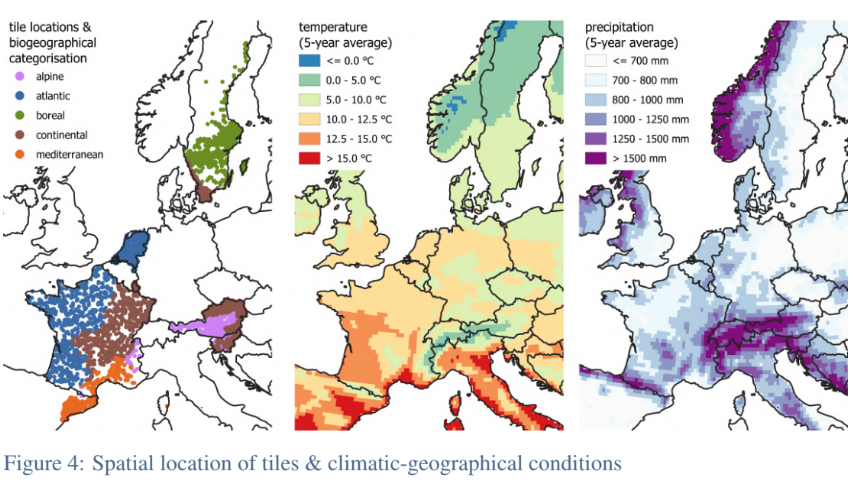

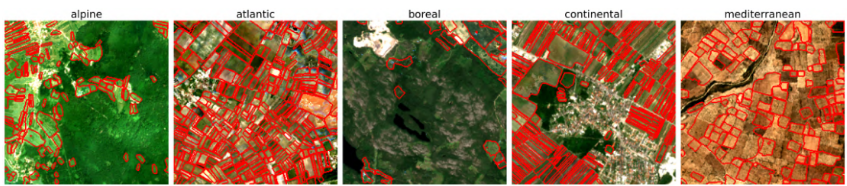

### Limitation of Sentinel-2 for field boundaries delineation (https://essd.copernicus.org/articles/15/317/2023/)

__Sentinel-2 has also inherent limitations for small parcels__ monitoring as it was already highlighted (Vajsová et al., 2020). They show that about 10 % out of 867 fields less than 0.5 ha in size were not monitorable with Sentinel-2.

The labels are obtained from __GSAA containing inherent caveats__. First of all, the geometry accuracy is referred to as , i.e. better than 1 m. Sometimes, parcels do not correspond to the agricultural field. Limitations of the labelled dataset could be the geometries, the timeliness, and also the semantics. As agricultural fields might be missing (e.g. due to not being present in original GSAA data), the data sets are really only suitable for the masked approach in training – the models trained on AI4Boundaries should only learn about the borders, extent, and distance of the included fields.

## Stats computation & analysis of AI4boundaries dataset

For each country:

1. Download image mask.
2. compute patch stats.
3. compute general stats.
4. download images+masks for problematic patches (e. g. no fields, small number of fields, small percentage of fields, complex fields, ...).
5. visualize random problematic patches.
6. final analysis for country.

Comparison analysis between countries. Localization. Number of parcels, area covered with fields, parcels sizes, parcels geometry, ...
Final analysis.

In [2]:
SENTINEL2_DIR = "C:\\Users\\alena.bakhoryna\\Documents\\code\\ai4boundaries_dataset"

### Netherlands (NL)

In [3]:
country = "NL"

In [ ]:
!python "../../src/eda/download_masks.py" --country="NL" --sentinel_dir=SENTINEL2_DIR

In [ ]:
!python "../../src/eda/patch_stats_computation.py" --country="NL" --sentinel_dir=SENTINEL2_DIR

In [ ]:
!python "../../src/eda/general_eda.py" --country="NL" --sentinel_dir=SENTINEL2_DIR

General information: 
           n_fields   prc_fields  sm_area_cnt  bg_area_cnt  sm_solidity_cnt  \
count  1157.000000  1157.000000  1157.000000  1157.000000      1157.000000   
mean    147.764909    44.638375    23.475367     0.165946         1.707001   
std     108.601769    28.387909    25.832046     0.653801         6.722996   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%      58.000000    17.300000     8.000000     0.000000         0.000000   
50%     134.000000    47.900000    19.000000     0.000000         0.000000   
75%     219.000000    70.000000    31.000000     0.000000         2.000000   
max     682.000000    94.500000   346.000000     9.000000       154.000000   

       bg_solidity_cnt  sm_eccentricity_cnt      area_min     area_mean  \
count      1157.000000          1157.000000   1094.000000   1094.000000   
mean         94.576491             1.454624     17.233090    277.309905   
std          67.202918             2.211731    35

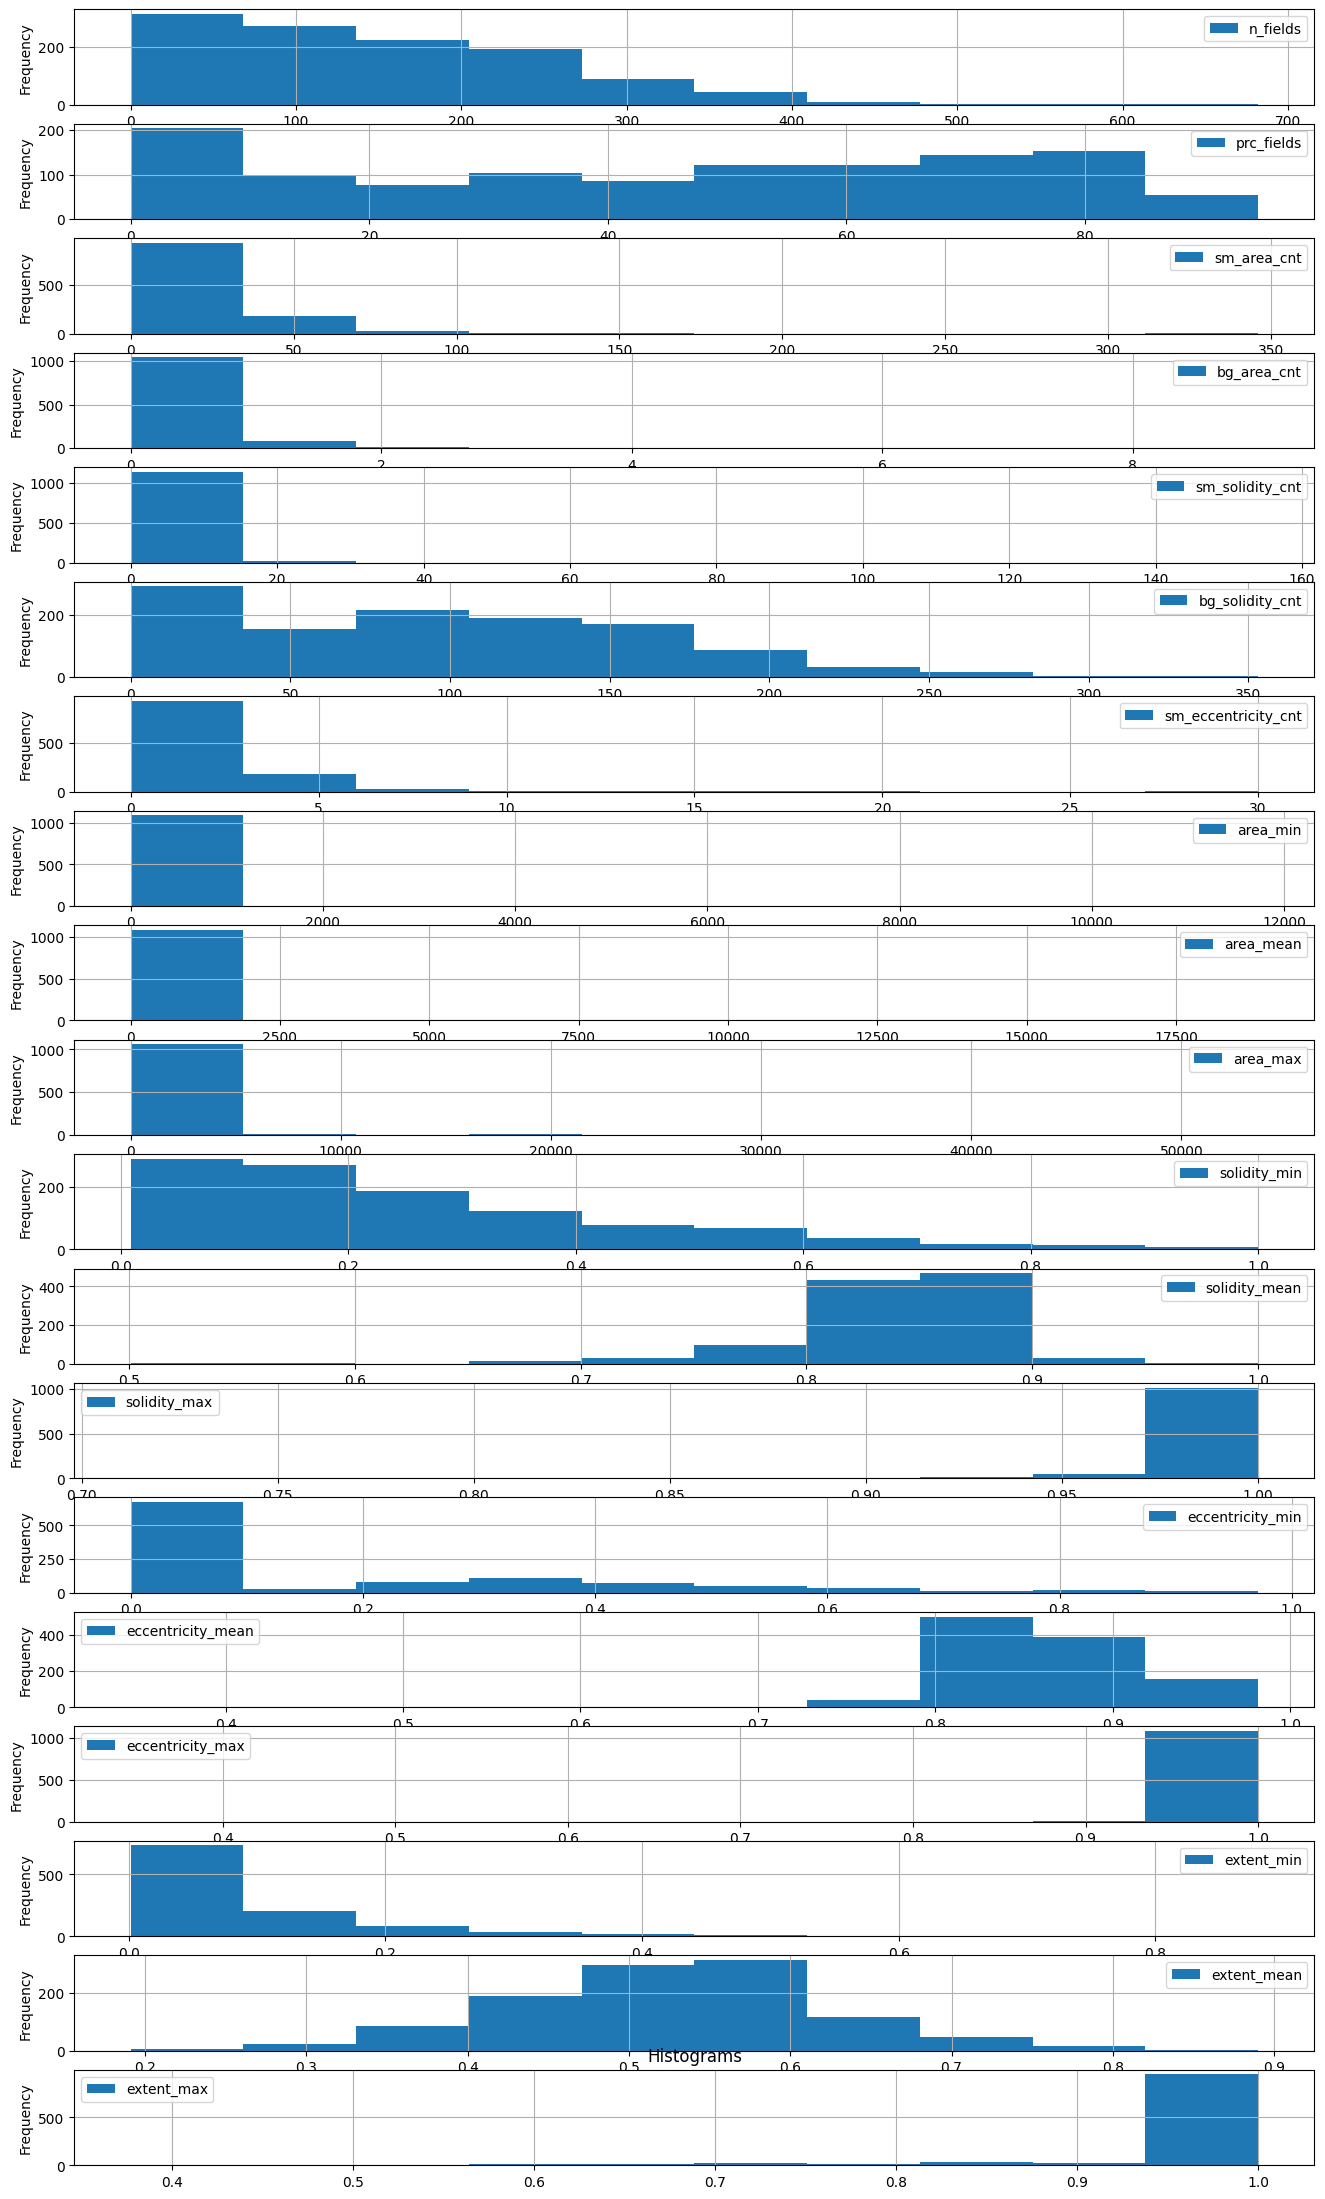

Total number of fields 0.17 M
Total area of fields in ha 33.85 M
Number of patches without fields present 63 (5.45%)
Number of patches with small percentage  (< 10) of fields present 143 (12.36%)
Number of patches with small number (< 40) of fields present 169 (14.61%)
Number of patches with small number or small percentage of fields present combined 186 (16.08%)
Number of patches with small number & small percentage of fields present combined 126 (10.89%)
Number of patches with n_fields (>= 364.97) of fields present 41 (3.54%)
Number of patches with prc_fields (>= 75.0) of fields present 214 (18.5%)
Number of patches with prc_fields (< 25.0) of fields present 344 (29.73%)
Number of patches with sm_area_cnt (>= 75.14) of fields present 32 (2.77%)
Number of patches with bg_area_cnt (>= 1.47) of fields present 36 (3.11%)
Number of patches with sm_solidity_cnt (>= 15.15) of fields present 16 (1.38%)
Number of patches with bg_solidity_cnt (>= 228.98) of fields present 32 (2.77%)
Number of 

In [30]:
data = general_eda_main(SENTINEL2_DIR, country,
                     sm_prc_fields=10, sm_num_fields=40)

In [5]:
data = pd.read_csv(path_out)

In [8]:
data.head(2)

Unnamed: 0        lat       lon  n_fields  prc_fields  sm_area_cnt  \
0           0  51.447901  4.120274        20         7.1            4   
1           1  51.483719  4.115650         0         0.0            0   

   bg_area_cnt  sm_solidity_cnt  bg_solidity_cnt  sm_eccentricity_cnt  ...  \
0            0                0                5                    0  ...   
1            0                0                0                    0  ...   

   sm_area_cnt_gt  sm_area_cnt_ls  bg_area_cnt_gt  bg_area_cnt_ls  \
0           False           False           False           False   
1           False           False           False           False   

   sm_solidity_cnt_gt  sm_solidity_cnt_ls  bg_solidity_cnt_gt  \
0               False               False               False   
1               False               False               False   

   bg_solidity_cnt_ls  sm_eccentricity_cnt_gt  sm_eccentricity_cnt_ls  
0                True                   False                   False  
1                True                   False                   False  

[2 rows x 46 columns]

In [7]:
data.columns

Index(['Unnamed: 0', 'lat', 'lon', 'n_fields', 'prc_fields', 'sm_area_cnt',
       'bg_area_cnt', 'sm_solidity_cnt', 'bg_solidity_cnt',
       'sm_eccentricity_cnt', 'area_min', 'perimeter_min', 'solidity_min',
       'eccentricity_min', 'extent_min', 'orientation_min', 'area_mean',
       'perimeter_mean', 'solidity_mean', 'eccentricity_mean', 'extent_mean',
       'orientation_mean', 'area_max', 'perimeter_max', 'solidity_max',
       'eccentricity_max', 'extent_max', 'orientation_max', 'file_id',
       'no_field', 'sm_prc_fields', 'sm_num_fields', 'n_fields_gt',
       'n_fields_ls', 'prc_fields_gt', 'prc_fields_ls', 'sm_area_cnt_gt',
       'sm_area_cnt_ls', 'bg_area_cnt_gt', 'bg_area_cnt_ls',
       'sm_solidity_cnt_gt', 'sm_solidity_cnt_ls', 'bg_solidity_cnt_gt',
       'bg_solidity_cnt_ls', 'sm_eccentricity_cnt_gt',
       'sm_eccentricity_cnt_ls'],
      dtype='object')

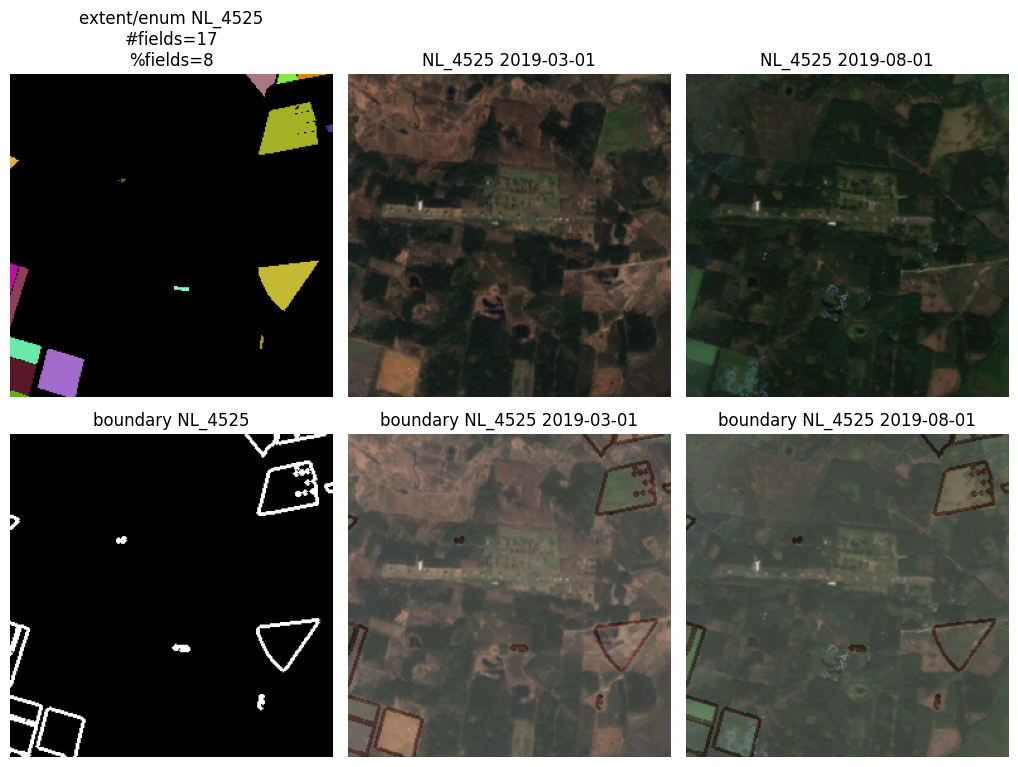

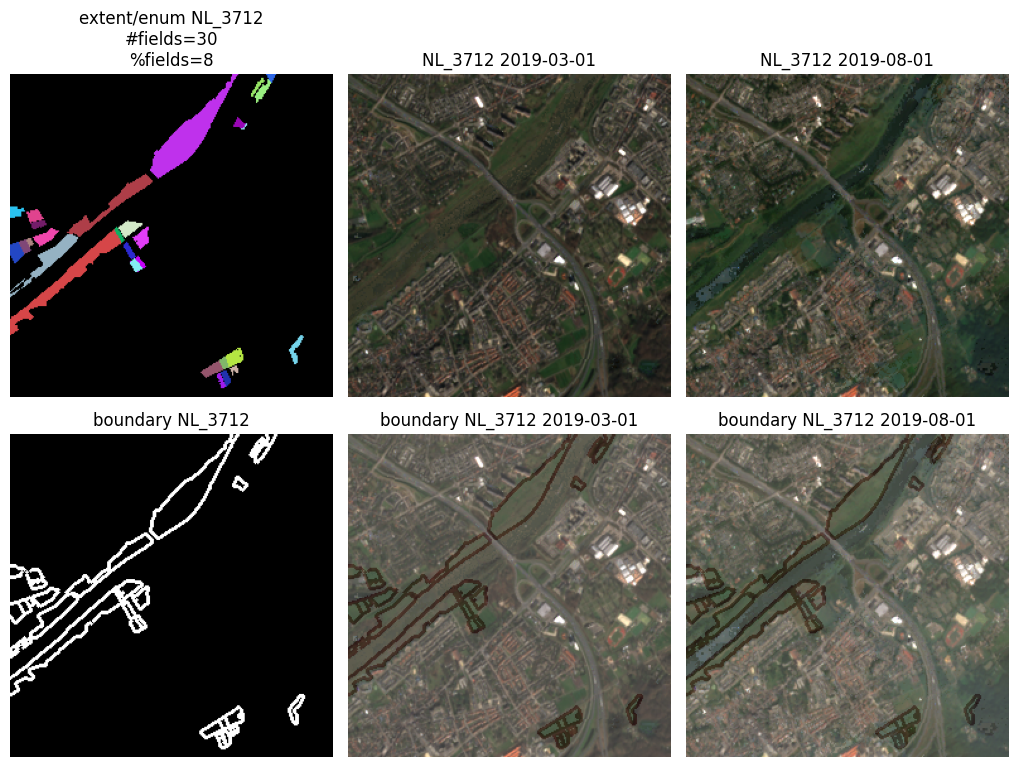

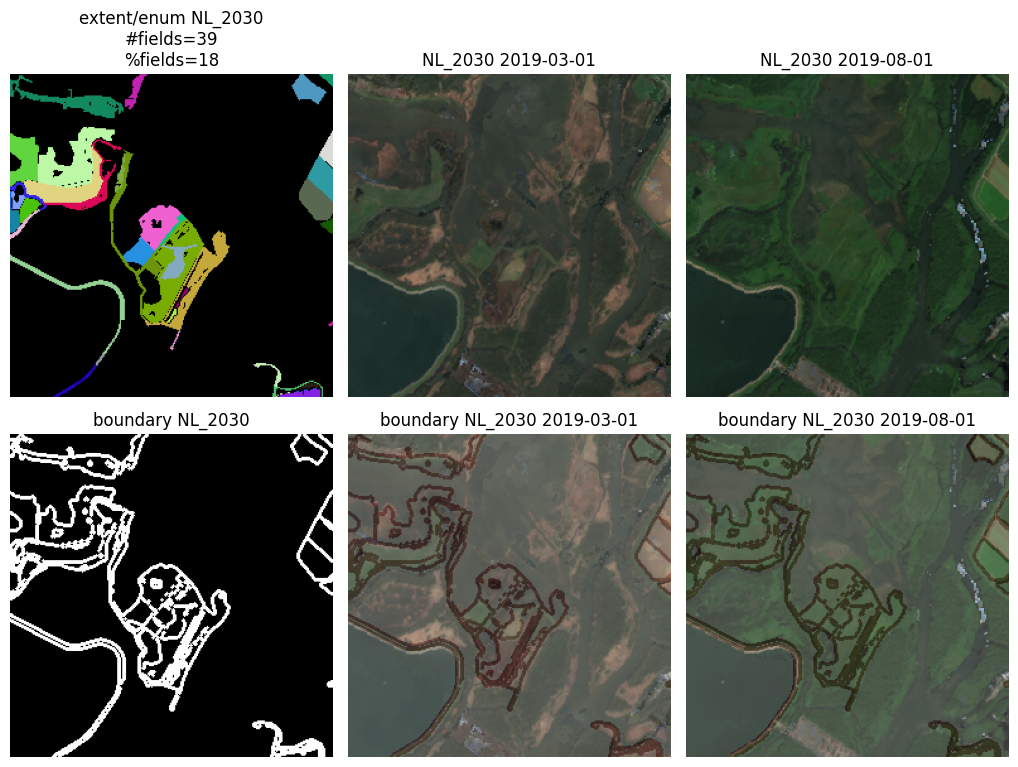

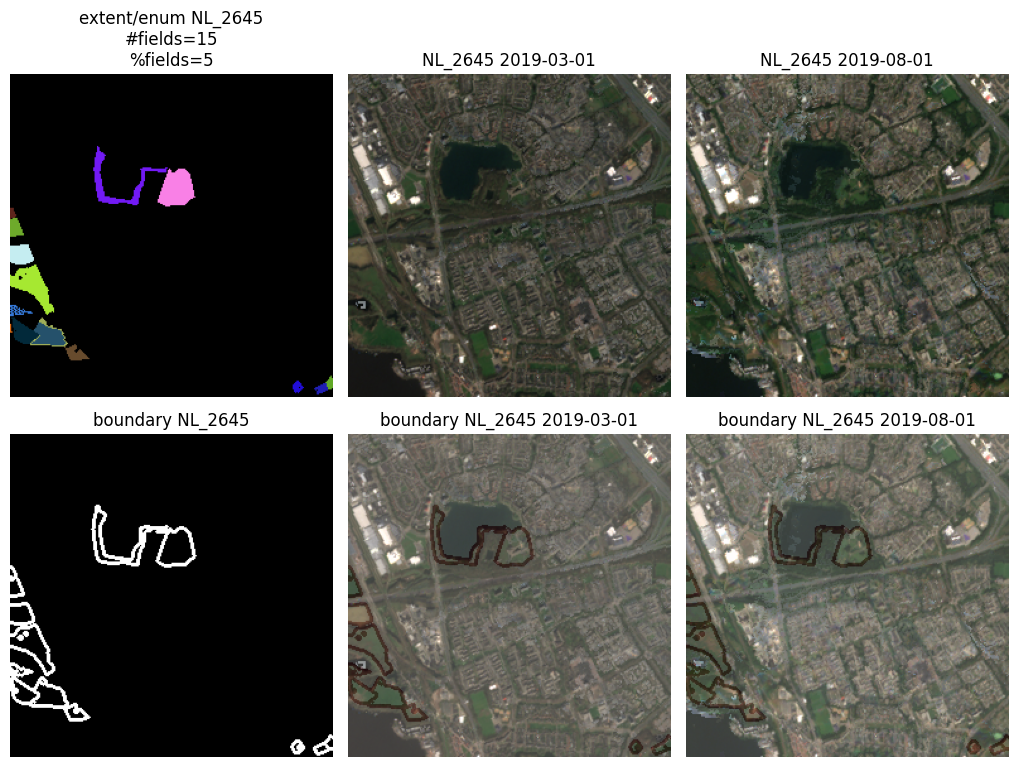

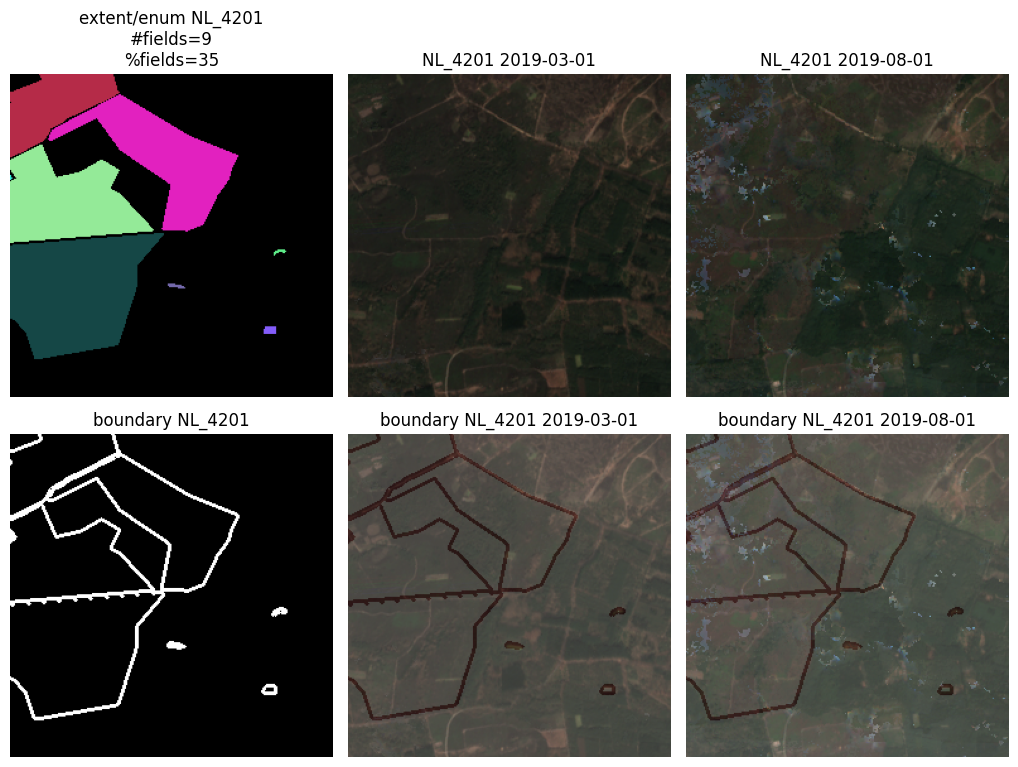

In [26]:
col = 'sm_num_fields' #'no_field'
num_plots = 5
num_img = 2

file_ids = data[data[col]].reset_index(drop=True)
file_ids = file_ids.file_id.tolist()
file_ids = random.sample(file_ids, k=num_plots)

abs_path = os.path.join(SENTINEL2_DIR, country)
path_to_pdf = os.path.join(SENTINEL2_DIR, f"{col}_{country}_v1.pdf")

save2pdf(path_to_pdf, abs_path, file_ids, num_img=num_img)

In [33]:
# n_fields
visualize_col_data(data, SENTINEL2_DIR, country='NL', col='n_fields_gt', num_img=2,
                       num_plots=5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\alena.bakhoryna\\Documents\\code\\ai4boundaries_dataset\\NL\\images\\NL_2189_S2_10m_256.nc'

### Slovenia